**TASK 1: Preparing test Environment**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 20, 'linewidths':3}

In [2]:
data = np.load('/content/data.npy')

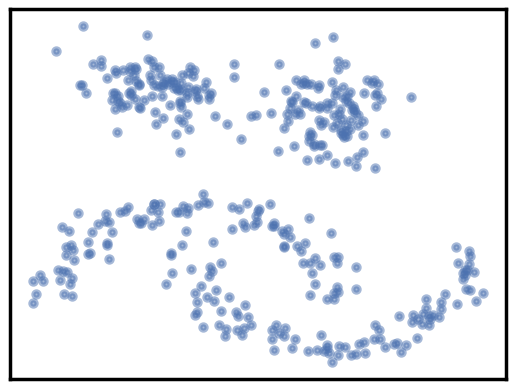

In [3]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

# plt.savefig('scatterplot.png')

In [4]:
#This is the clustering and clusters plotting function
def plot_clusters(data, algorithm, args, kwds):
  start_time = time.time()
  labels = algorithm(*args, **kwds).fit_predict(data)
  end_time = time.time()
  palette = sns.color_palette('deep', np.unique(labels).max() + 1)
  colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
  plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
  plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
  plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time),
  fontsize=14)

**K-means Syntax**

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6, 'n_init':'value','init':'value'})

**DBSCAN Syntax**

In [ ]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':'value', 'min_samples':'value' })

**Birch Syntax**

In [ ]:
plot_clusters(data, cluster.Birch, (), {"threshold":'value', "n_clusters":6,'branching_factor':'value'})

**Affinity Propagation Syntax**

In [ ]:
plot_clusters(data, cluster.AffinityPropagation, (), {'damping':'value'})

**OPTICS Syntax**

In [ ]:
plot_clusters(data, cluster.OPTICS, (), {'max_eps':'value', 'min_samples':'value'})

**Agglomerative Clustering Syntax**

In [ ]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6,'linkage':'value' })

**HDBSCAN Syntax**

In [ ]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':'value','min_samples':'value'})

**Spectral Clustering Syntax**

In [ ]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6,'affinity':'value' })

**TASK 3: Testing and documenting the output of the algorithms**

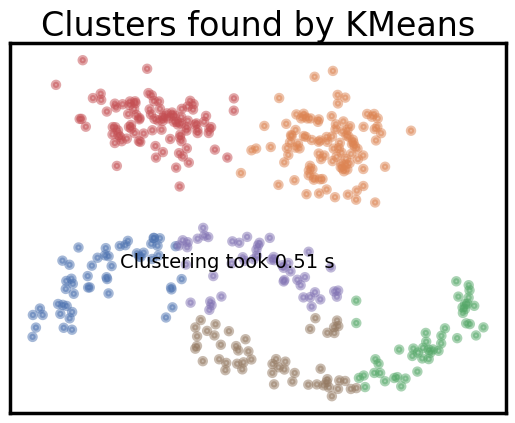

In [5]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6, 'n_init':'auto','init':'k-means++','max_iter':300})

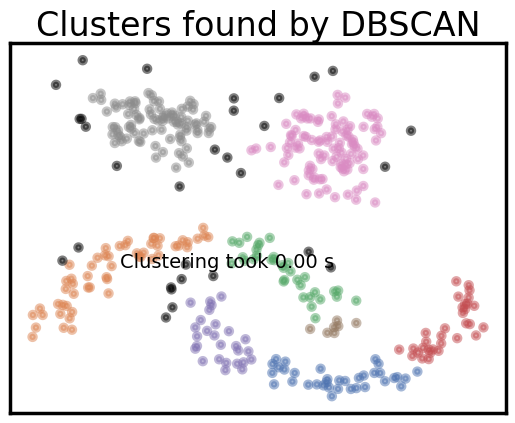

In [6]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.15, 'min_samples':4 })

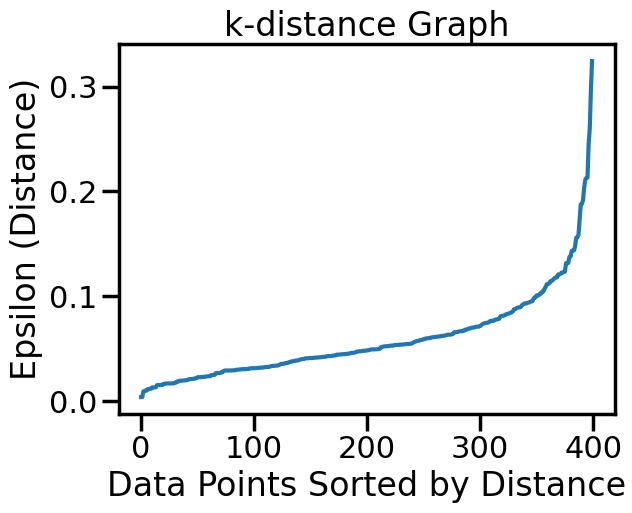

In [7]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)[:, 1]

# Plot the k-distance graph
plt.plot(np.arange(len(data)), distances)
plt.title('k-distance Graph')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('Epsilon (Distance)')
plt.show()


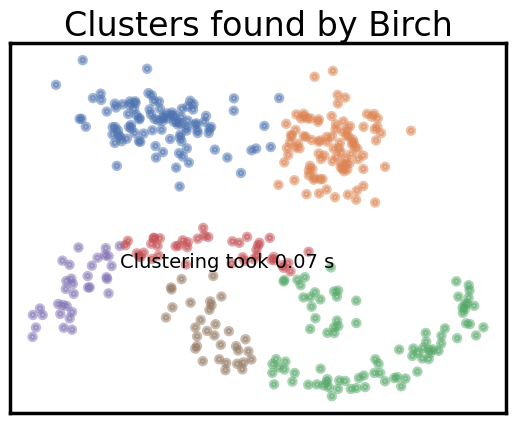

In [8]:
plot_clusters(data, cluster.Birch, (), {"threshold":0.2, "n_clusters":6,'branching_factor':50})

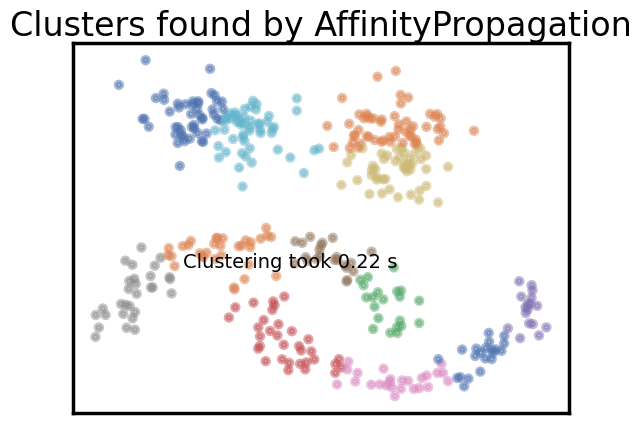

In [9]:
plot_clusters(data, cluster.AffinityPropagation, (), {'damping':0.7})

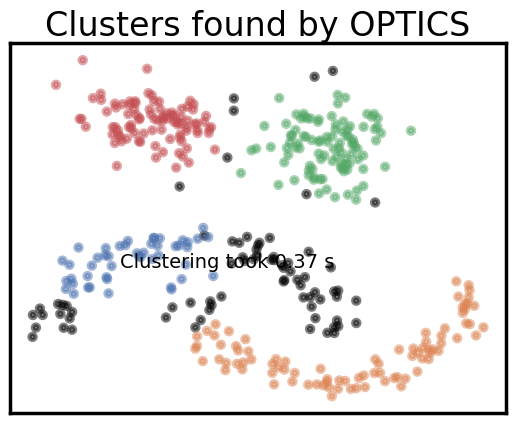

In [10]:
plot_clusters(data, cluster.OPTICS, (), {'max_eps':np.inf, 'min_samples':25})

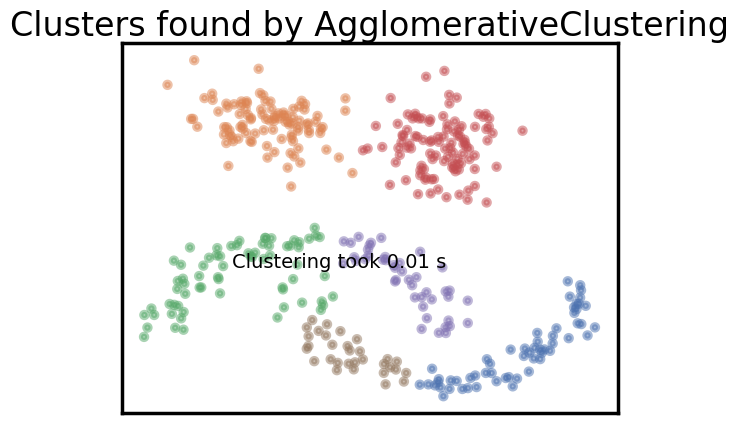

In [11]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6,'linkage':'average' })

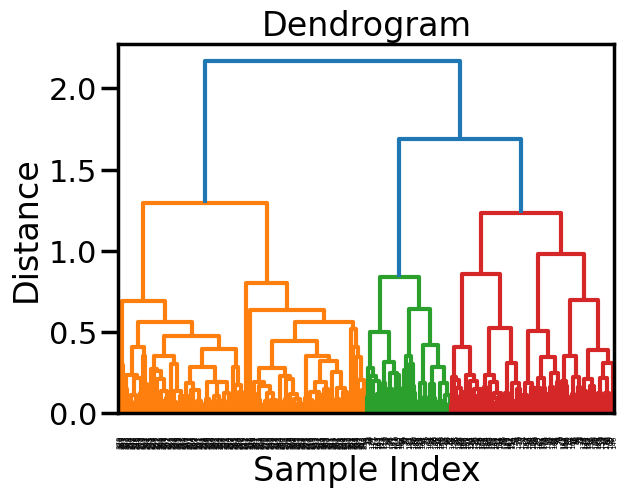

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(data, method='average')

# Plot the dendrogram
dendrogram(linkage_matrix)

# Show the plot
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

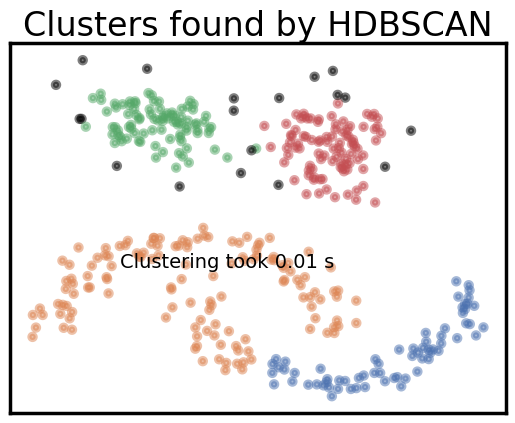

In [14]:
import hdbscan

plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15,'min_samples':4})

In [13]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 24.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039291 sha256=b8c72922e000da7fdda72209ed651255da9f554fd3326c1b7838b61d936ea389
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.6
    Uninstalling Cython-3.0.6:
      Successfully uninstalled Cython-3.0.6


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


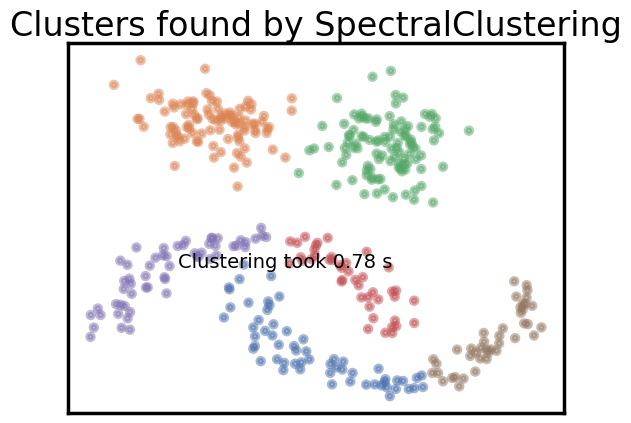

In [50]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6,'affinity':'nearest_neighbors' })